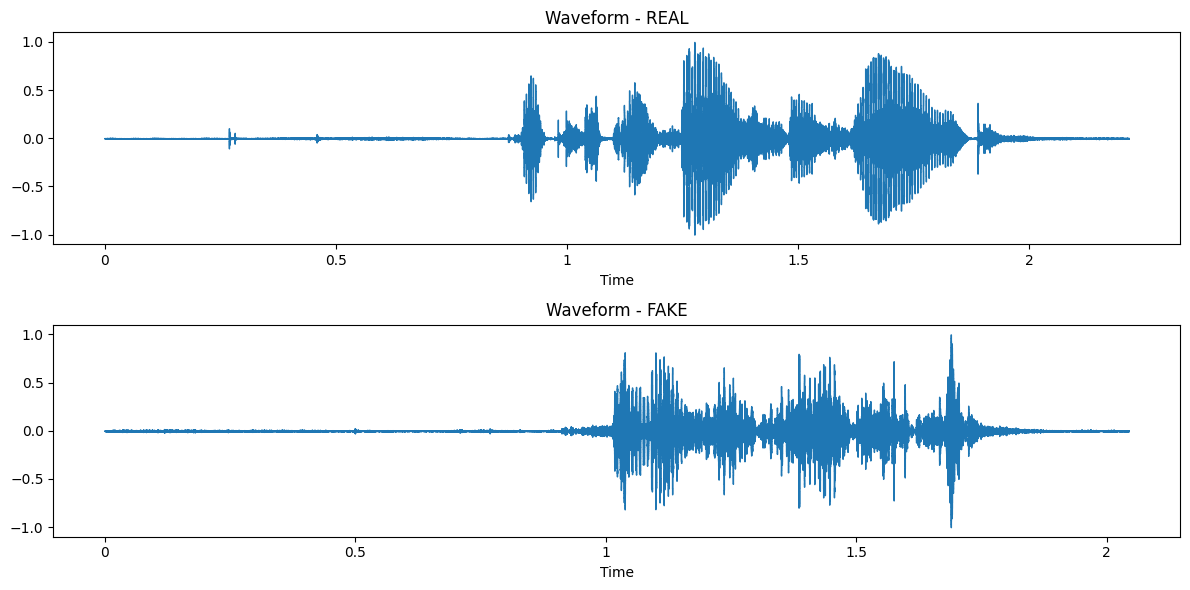

In [14]:
import librosa, librosa.display
import matplotlib.pyplot as plt
import numpy as np

path_fake = "D:/Pythonfile/Audio-Deepfake-Detection/data/processed/eval/spoof/LA_E_1631732.flac"
path_real = "D:/Pythonfile/Audio-Deepfake-Detection/data/processed/eval/bonafide/LA_E_1644905.flac"

y_fake, sr = librosa.load(path_fake, sr=16000)
y_real, _  = librosa.load(path_real, sr=16000)

plt.figure(figsize=(12,6))

plt.subplot(2,1,1)
librosa.display.waveshow(y_real, sr=sr)
plt.title("Waveform - REAL")

plt.subplot(2,1,2)
librosa.display.waveshow(y_fake, sr=sr)
plt.title("Waveform - FAKE")

plt.tight_layout()
plt.show()


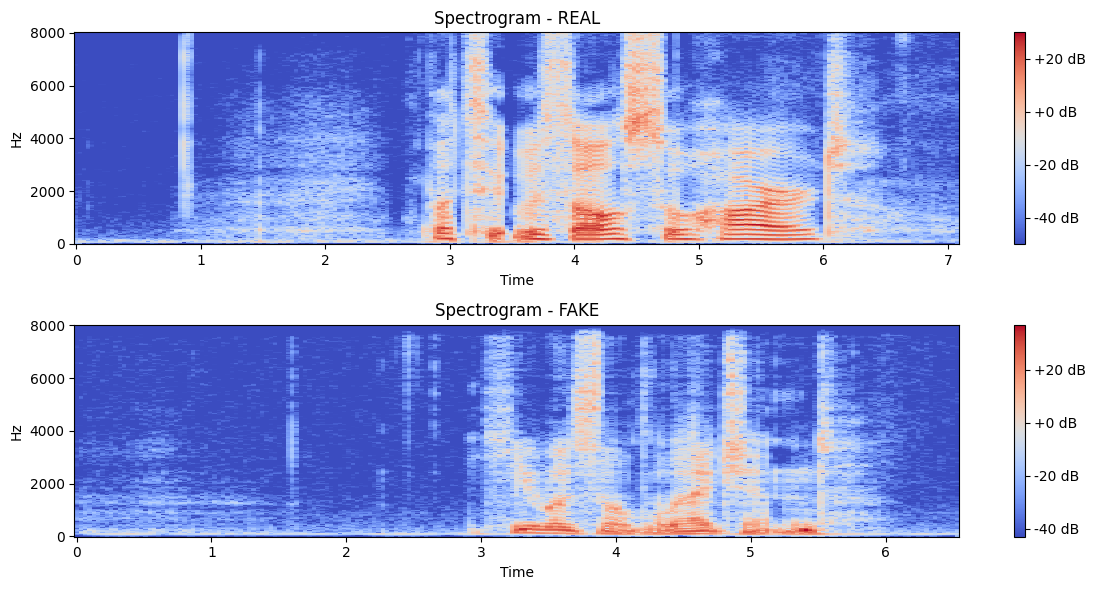

In [15]:
def plot_spec(y, title):
    D = librosa.stft(y, n_fft=512, hop_length=160)
    S_db = librosa.amplitude_to_db(np.abs(D))
    librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar(format='%+2.0f dB')
    plt.title(title)

plt.figure(figsize=(12,6))

plt.subplot(2,1,1)
plot_spec(y_real, "Spectrogram - REAL")

plt.subplot(2,1,2)
plot_spec(y_fake, "Spectrogram - FAKE")

plt.tight_layout()
plt.show()


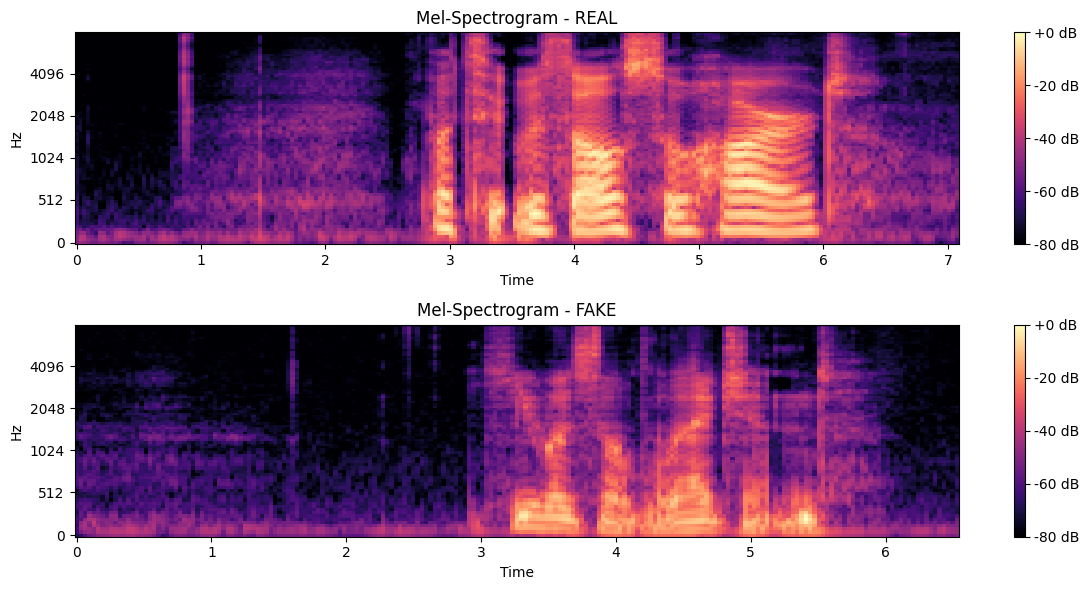

In [16]:
def plot_mel(y, title):
    mel = librosa.feature.melspectrogram(
        y=y,
        sr=sr,
        n_fft=512,
        hop_length=160,
        win_length=400,
        n_mels=80
    )
    mel_db = librosa.power_to_db(mel, ref=np.max)
    librosa.display.specshow(mel_db, sr=sr, x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f dB')
    plt.title(title)

plt.figure(figsize=(12,6))

plt.subplot(2,1,1)
plot_mel(y_real, "Mel-Spectrogram - REAL")

plt.subplot(2,1,2)
plot_mel(y_fake, "Mel-Spectrogram - FAKE")

plt.tight_layout()
plt.show()


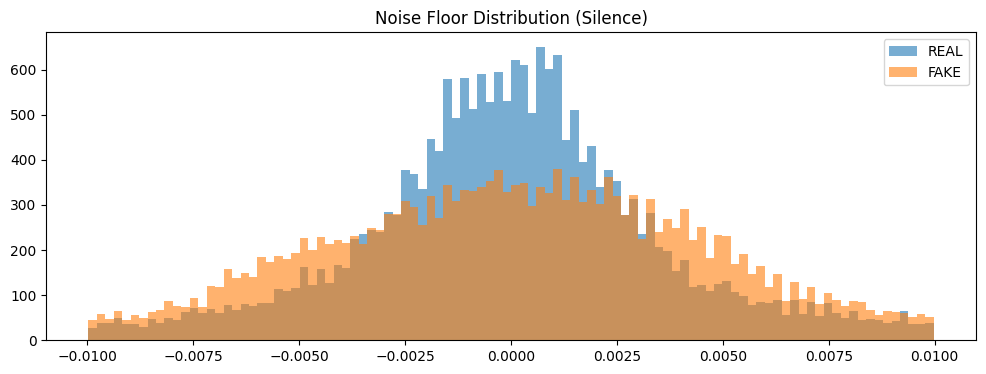

In [17]:
def noise_floor(y, thresh=0.01):
    return y[np.abs(y) < thresh]

plt.figure(figsize=(12,4))

plt.hist(noise_floor(y_real), bins=100, alpha=0.6, label='REAL')
plt.hist(noise_floor(y_fake), bins=100, alpha=0.6, label='FAKE')

plt.legend()
plt.title("Noise Floor Distribution (Silence)")
plt.show()


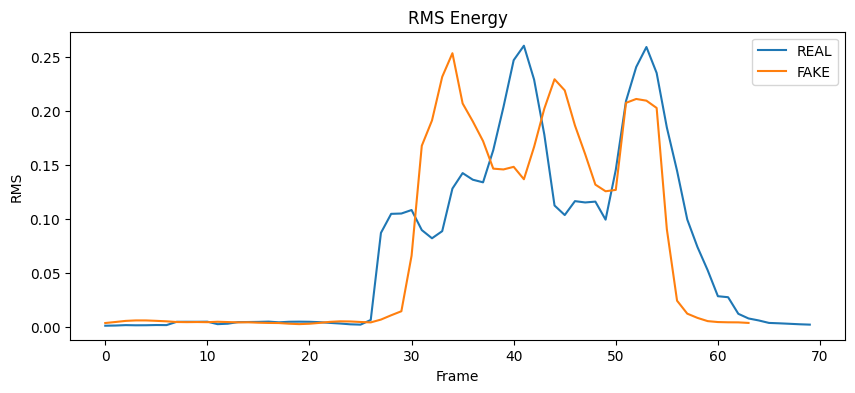

In [18]:
rms_real = librosa.feature.rms(y=y_real)[0]
rms_fake = librosa.feature.rms(y=y_fake)[0]

plt.figure(figsize=(10,4))
plt.plot(rms_real, label='REAL')
plt.plot(rms_fake, label='FAKE')
plt.legend()
plt.title("RMS Energy")
plt.xlabel("Frame")
plt.ylabel("RMS")
plt.show()


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101


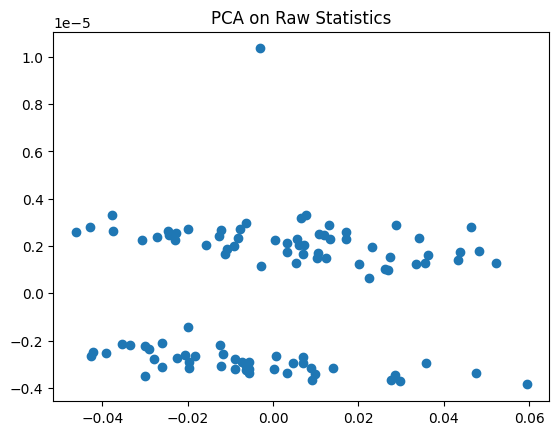

In [ ]:
from sklearn.decomposition import PCA
import os

real_dir = "D:/Pythonfile/Audio-Deepfake-Detection/data/processed/eval/bonafide"
fake_dir = "D:/Pythonfile/Audio-Deepfake-Detection/data/processed/eval/spoof"
y_real_list = []
y_fake_list = []
count = 0
for file in os.listdir(real_dir):
    if file.lower().endswith(".flac"):
        path = os.path.join(real_dir, file)
        y_, sr = librosa.load(path, sr=16000)
        y_real_list.append(y_)
        count += 1
        if count >= 100:
            break
count = 0
for file in os.listdir(fake_dir):
    if file.lower().endswith(".flac"):
        path = os.path.join(fake_dir, file)
        y_, sr = librosa.load(path, sr=16000)
        y_fake_list.append(y_)
        count += 1
        if count >= 100:
            break
X = np.vstack(
    [[np.mean(y), np.std(y), np.max(np.abs(y))] for y in y_real_list] +
    [[np.mean(y), np.std(y), np.max(np.abs(y))] for y in y_fake_list]
)

# X = np.vstack([
#     [np.mean(y_real), np.std(y_real), np.max(y_real)],
#     [np.mean(y_fake), np.std(y_fake), np.max(y_fake)]
# ])

X_pca = PCA(n_components=2).fit_transform(X)

plt.scatter(X_pca[:,0], X_pca[:,1])
plt.title("PCA on Raw Statistics")
plt.show()
